# Reconocimiento de las señales de tráfico

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

In [37]:
print(tf.__version__)
import os
import skimage.io as imd
import numpy as np
import imageio.v3 as iio


2.12.0


In [ ]:
# voy a crear función para cargar las imágenes de cada señal
# vamos a ir viendo los print paso a paso y al final estará la función completa

In [4]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]
    print(dirs)


In [7]:
load_ml_data("/content/drive/MyDrive/Python Machine Learning JGG/datasets/belgian/Training/")

['00001', '00004', '00006', '00003', '00000', '00005', '00002', '00011', '00014', '00010', '00015', '00008', '00012', '00016', '00007', '00013', '00009', '00019', '00017', '00018', '00025', '00023', '00022', '00020', '00021', '00026', '00024', '00035', '00033', '00036', '00030', '00032', '00028', '00031', '00034', '00029', '00027', '00041', '00046', '00044', '00040', '00038', '00045', '00043', '00037', '00042', '00039', '00048', '00053', '00052', '00047', '00055', '00050', '00049', '00054', '00056', '00051', '00059', '00058', '00060', '00061', '00057']


In [ ]:
# observamos que ha cargado todos los directorios (subcarpetas)

In [ ]:
# vamos a necesitar dos arrays: labels e imagenes

In [8]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]

    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        print(label_dir)
        print(file_names)

In [9]:
load_ml_data("/content/drive/MyDrive/Python Machine Learning JGG/datasets/belgian/Training/")

/content/drive/MyDrive/Python Machine Learning JGG/datasets/belgian/Training/00001
['/content/drive/MyDrive/Python Machine Learning JGG/datasets/belgian/Training/00001/01585_00002.ppm', '/content/drive/MyDrive/Python Machine Learning JGG/datasets/belgian/Training/00001/00136_00001.ppm', '/content/drive/MyDrive/Python Machine Learning JGG/datasets/belgian/Training/00001/00881_00002.ppm', '/content/drive/MyDrive/Python Machine Learning JGG/datasets/belgian/Training/00001/00025_00002.ppm', '/content/drive/MyDrive/Python Machine Learning JGG/datasets/belgian/Training/00001/01028_00000.ppm', '/content/drive/MyDrive/Python Machine Learning JGG/datasets/belgian/Training/00001/01699_00002.ppm', '/content/drive/MyDrive/Python Machine Learning JGG/datasets/belgian/Training/00001/01590_00001.ppm', '/content/drive/MyDrive/Python Machine Learning JGG/datasets/belgian/Training/00001/00079_00001.ppm', '/content/drive/MyDrive/Python Machine Learning JGG/datasets/belgian/Training/00001/00876_00001.ppm'

In [38]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]

    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            # images.append(imd.imread(f))
            images.append(iio.imread(f))
            labels.append(int(d))
        
    return images, labels

In [ ]:
# voy a cargar tanto las imágenes de training y testing

In [39]:
main_dir = "/content/drive/MyDrive/Python Machine Learning JGG/datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [40]:
images, labels = load_ml_data(train_data_dir)

In [41]:
len(images)

4588

In [42]:
type(images)

list

In [43]:
type(labels)

list

In [ ]:
# como tanto images como labes son tipo lista, las vamos a pasar a dataset

In [44]:
images = np.array(images)

<ipython-input-44-2bbd740f17cb>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [45]:
labels = np.array(labels)

In [46]:
images.ndim

1

In [47]:
labels.ndim

1

In [48]:
images.size

4588

In [49]:
labels.size

4588

In [ ]:
# esta es la primera foto:   # son pixeles que van desde 1 a 255 del rojo, verde y azul. Es decir, la primera columna es toda la foto en rojo, la segunda columna en verde, y la tercera en azul

In [50]:
images[0]

array([[[ 37,  44,  26],
        [ 31,  39,  21],
        [ 28,  37,  20],
        ...,
        [ 38,  49,  21],
        [ 49,  61,  33],
        [ 56,  67,  39]],

       [[ 29,  33,  14],
        [ 27,  33,  15],
        [ 30,  35,  18],
        ...,
        [ 47,  56,  29],
        [ 56,  65,  38],
        [ 67,  75,  48]],

       [[ 27,  30,  10],
        [ 30,  34,  15],
        [ 37,  40,  22],
        ...,
        [ 57,  64,  38],
        [ 63,  70,  44],
        [ 76,  83,  57]],

       ...,

       [[ 29,  24,  19],
        [ 28,  25,  19],
        [ 26,  26,  19],
        ...,
        [114, 142,  85],
        [112, 145,  89],
        [111, 145,  87]],

       [[ 28,  23,  17],
        [ 24,  20,  13],
        [ 19,  19,  13],
        ...,
        [104, 132,  73],
        [105, 134,  80],
        [107, 138,  82]],

       [[ 26,  23,  16],
        [ 22,  20,  12],
        [ 19,  21,  14],
        ...,
        [100, 128,  66],
        [101, 127,  74],
        [107, 134,  79]]

In [51]:
len(set(labels))     #set me saca los unicos (es un conjunto...y en un cjto no hay repetidos)

62

In [52]:
set(labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61}

In [ ]:
# es decir, tenemos 62 señales distintas y en total hay 4588 imágenes

In [ ]:
# ojo, tengo que ver si con lo que he cargado voy a saturar el sistema (memory wise)

In [53]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [54]:
images.itemsize   # elementos en 8 bits

8

In [55]:
images.nbytes

36704

In [56]:
images.nbytes / images.itemsize

4588.0

In [ ]:
# estoy usando 4588 bits de información

In [ ]:
# voy a visualizar los datos

In [57]:
import matplotlib.pyplot as plt

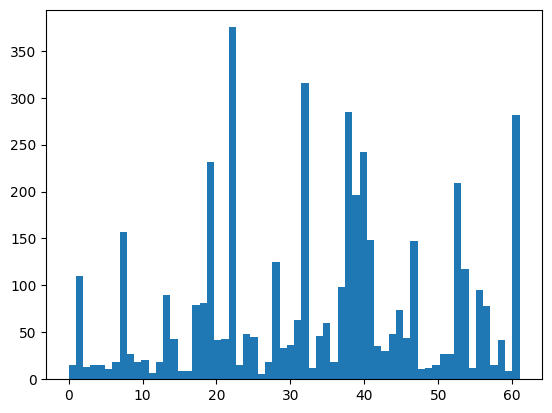

In [58]:
plt.hist(labels, len(set(labels)))
plt.show()

In [ ]:
# hay 62 señales, se ve que hay algunas señales con muchas fotos, otras con menos

# ojo, que si de una, o varias señales, tengo muchísimas muchísimas, puede hacer que la red neuronal dude, es decir, si no logra identificar bien una señal, 
# puede que "piense" que debe ser la más probable, en este caso sería la señal 22....y a lo mejor se equivoca

In [ ]:
# para solucionarlo, podría eliminar a mano alguna de las fotos de las señales que más tienen

In [ ]:
# vamos a sacar 6 señales de todas las señales que tenemos:

In [59]:
import random

In [67]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[2744, 2074, 751, 1739, 4168, 2661]

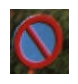

Forma:(61, 55, 3), min:0, max:197


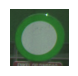

Forma:(124, 128, 3), min:10, max:255


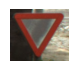

Forma:(109, 123, 3), min:16, max:255


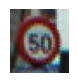

Forma:(37, 34, 3), min:0, max:247


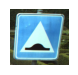

Forma:(241, 252, 3), min:0, max:255


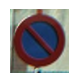

Forma:(80, 73, 3), min:0, max:255


In [68]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))
    
# la forma significa altura en pixels, anchura y 3 significa los canales: RGB
# el min significa que el pixel con menor es por ejemplo 0 (totalmente negro) y el max es por ejemplo 255 (totalmente blanco)

In [ ]:
# ojo que si la red neuronal va a "distinguir" señales por el minimo y máximo vamos mal, porque casi todas las señales de distintos grupos tienen un mínimo de 0 (o cerca) y un máximos de 255 (o cerca)
# a su vez, tampoco se puede guiar por el tamaño, ya que las fotos dentro de cada señal tienen tamaños diferentes

# entonces ojo con los parametros de decisión

In [ ]:
# vamos a hacer una representación de cada señal:

In [70]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

In [ ]:
# vamos a reescalar (para que tengan el mismo tamaño) y las vamos a pasar a escala de grises.
# en este caso vemos que fijarnos en el color puede no ser buena idea (hay imágenes muy oscuras, otras quemadas,...)

In [143]:
from skimage import transform

In [ ]:
# busco los tamaños más pequeños:

In [144]:
w = 9999 # pongo una anchura y altura muy grandes y hago bucle
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 22x20


In [ ]:
# ojo, son muy pequeñas, quizá pierda mucha información
# voy a pasarlas a todas a 30x30 (evidentemente alguna las deformará, )

In [145]:
images30 = [transform.resize(image, (30,30)) for image in images]

In [ ]:
#vemos como cambian los datos de la primera foto:

In [146]:
images[0]

array([[[ 37,  44,  26],
        [ 31,  39,  21],
        [ 28,  37,  20],
        ...,
        [ 38,  49,  21],
        [ 49,  61,  33],
        [ 56,  67,  39]],

       [[ 29,  33,  14],
        [ 27,  33,  15],
        [ 30,  35,  18],
        ...,
        [ 47,  56,  29],
        [ 56,  65,  38],
        [ 67,  75,  48]],

       [[ 27,  30,  10],
        [ 30,  34,  15],
        [ 37,  40,  22],
        ...,
        [ 57,  64,  38],
        [ 63,  70,  44],
        [ 76,  83,  57]],

       ...,

       [[ 29,  24,  19],
        [ 28,  25,  19],
        [ 26,  26,  19],
        ...,
        [114, 142,  85],
        [112, 145,  89],
        [111, 145,  87]],

       [[ 28,  23,  17],
        [ 24,  20,  13],
        [ 19,  19,  13],
        ...,
        [104, 132,  73],
        [105, 134,  80],
        [107, 138,  82]],

       [[ 26,  23,  16],
        [ 22,  20,  12],
        [ 19,  21,  14],
        ...,
        [100, 128,  66],
        [101, 127,  74],
        [107, 134,  79]]

In [147]:
images30[0]

array([[[0.17196455, 0.18437184, 0.10604443],
        [0.17118043, 0.15017272, 0.10402682],
        [0.12279755, 0.1325194 , 0.10382238],
        ...,
        [0.14337809, 0.16426474, 0.10515423],
        [0.19157912, 0.22364353, 0.13561879],
        [0.20759363, 0.24334722, 0.14140416]],

       [[0.28300838, 0.32722805, 0.19010616],
        [0.24732298, 0.24325707, 0.12614572],
        [0.19959069, 0.18741919, 0.12975388],
        ...,
        [0.14397465, 0.15203084, 0.10082196],
        [0.23752688, 0.26451763, 0.15502246],
        [0.2096192 , 0.22129522, 0.13030115]],

       [[0.236001  , 0.31839848, 0.20214761],
        [0.28352049, 0.3343722 , 0.1911793 ],
        [0.244066  , 0.24197345, 0.14809464],
        ...,
        [0.15306492, 0.17936882, 0.11915895],
        [0.19778696, 0.24799561, 0.13367049],
        [0.18487757, 0.21113356, 0.12730146]],

       ...,

       [[0.09071069, 0.08383142, 0.06814951],
        [0.10015805, 0.09998484, 0.07980554],
        [0.13883368, 0

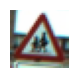

Forma:(30, 30, 3), min:0.04879921478933827, max:1.0


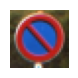

Forma:(30, 30, 3), min:0.06680523677826858, max:0.9830070058496216


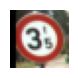

Forma:(30, 30, 3), min:0.0, max:0.998968696984541


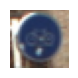

Forma:(30, 30, 3), min:0.11612472421717555, max:0.9999855721111491


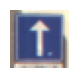

Forma:(30, 30, 3), min:0.19003399743194427, max:0.9998386749193573


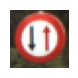

Forma:(30, 30, 3), min:0.09093339920671822, max:0.999926041534799


In [148]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [ ]:
# ahora lo paso a escala de grises:

In [149]:
from skimage.color import rgb2gray

In [150]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

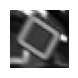

Forma:(30, 30), min:0.061558128102655964, max:0.9983635453158125


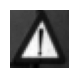

Forma:(30, 30), min:0.04922834668298114, max:0.3332114221578242


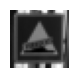

Forma:(30, 30), min:0.09329540589869345, max:0.999242612815802


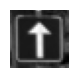

Forma:(30, 30), min:0.1214974294712153, max:0.9127437605300079


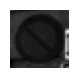

Forma:(30, 30), min:0.08030411046458816, max:0.7099777816237798


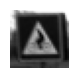

Forma:(30, 30), min:0.11588732476536766, max:0.9988328151223222


In [151]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")    #importante que ponga este cmap
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [152]:
# 1-lo primero es definir unos placeholders. (https://stackoverflow.com/questions/56561734/runtimeerror-tf-placeholder-is-not-compatible-with-eager-execution)
tf.compat.v1.disable_eager_execution()

x = tf.compat.v1.placeholder(dtype = tf.float32, shape = [None, 30,30])   
y = tf.compat.v1.placeholder(dtype = tf.int32, shape = [None])

In [153]:
# 2-vamos a construir la red neuronal: con flatten, le pasaremos array con los datos totales de cada una de las imagenes (recordamos que ya no hay tres canales porque lo hemos pasado a escala de grises y que cada imagen mide 30x30=900)

images_flat = tf.compat.v1.layers.flatten(x)
#esto transforma la matriz de 30x30 de cada imagen a una lista plana

logits = tf.compat.v1.layers.dense(images_flat, 62, tf.nn.relu)    
##capa de conexión = logits

<ipython-input-153-1367d614ce89>:3: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  images_flat = tf.compat.v1.layers.flatten(x)
<ipython-input-153-1367d614ce89>:6: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits = tf.compat.v1.layers.dense(images_flat, 62, tf.nn.relu)


In [154]:
# 3-definimos la función de pérdida: (función de clasificación)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits)) 

In [177]:
# 4-definimos una función para optimizar

train_opt = tf.optimizers.Adam(learning_rate=0.001).minimize(loss, var_list=None,tape=tf.GradientTape(persistent=False, watch_accessed_variables=True))


RuntimeError: ignored

In [156]:
final_pred = tf.argmax(logits,1)
accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

In [ ]:
#esto nos ha creado la red neuronal

In [ ]:
"""x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))"""

In [157]:
images_flat

<tf.Tensor 'flatten_3/Reshape:0' shape=(None, 900) dtype=float32>

In [158]:
logits

<tf.Tensor 'dense_2/Relu:0' shape=(None, 62) dtype=float32>

In [159]:
loss

<tf.Tensor 'Mean_5:0' shape=() dtype=float32>

In [160]:
final_pred

<tf.Tensor 'ArgMax_3:0' shape=(None,) dtype=int64>

In [ ]:
# ejecuto el modelo para entrenarlo

In [170]:
tf.random.set_seed(1234)   #es bueno establecer una semilla

sess = tf.compat.v1.Session()


tf.compat.v1.disable_eager_execution()


sess.run(tf.compat.v1.global_variables_initializer())

for i in range(601):   #decidimos nosotros cuántas veces lo queremos aplicar
    
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    _, loss_val = sess.run([train_opt, loss],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    if i%50 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        print("Pérdidas:", loss_val)
    print("Fin del Epoch ", i)

TypeError: ignored